In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [31]:
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

In [32]:
def GetCountByVal(data, column, bought):
    if bought == 1:
        new_data = data[[column]][(data[column] == 1) & (data.spend_usd_next_14_days > 0.001)]
    else:
        new_data = data[[column]][(data[column] == 1) & (data.spend_usd_next_14_days <= 0.001)]
    return (new_data.count())

In [73]:
def PlotList(data):
    plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal', 'fop']
    plt.bar((1, 2, 3, 4, 5), data, align='center')
    plt.xticks((1, 2, 3, 4, 5), plt_index, rotation=45)
    plt.show()

In [34]:
my_data = pd.read_csv("C:\Users\wangz_i6ij2py\Downloads\Python_project_eda.csv")

In [35]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [36]:
#clean up data
my_data['spend_usd_next_14_days'] = winsorize_series(my_data['spend_usd_next_14_days'])
clean_data = my_data.fillna(0)
clean_data.describe()

C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,7.824868,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,35.159074,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [37]:
pot_buyer = clean_data[['existing_buyer', 'saw_cart_before', 'user_added_credit_card', 'user_added_dcb', 'user_added_fop', 'user_added_gift_card', 'user_added_paypal' ,'spend_usd_next_14_days']][(clean_data.existing_buyer == 0) & (clean_data.saw_cart_before == 1.0)]
pot_buyer.describe()

,existing_buyer,saw_cart_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,321389.0,321389.0,321389.000000,321389.000000,321389.000000,321389.000000,321389.000000,321389.000000
mean,0.0,1.0,0.016444,0.042945,0.062068,0.001658,0.002321,0.150539
std,0.0,0.0,0.127177,0.202733,0.241280,0.040690,0.048123,3.612179
min,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


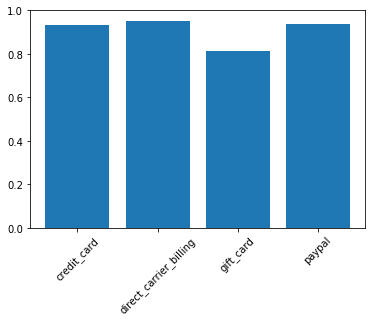

In [72]:
total = pot_buyer.shape[0]
cc_rate = GetCountByVal(pot_buyer, 'user_added_credit_card', 0) / float(total) / pot_buyer['user_added_credit_card'].mean()
dc_rate = GetCountByVal(pot_buyer, 'user_added_dcb', 0) / float(total) / pot_buyer['user_added_dcb'].mean()
gc_rate = GetCountByVal(pot_buyer, 'user_added_ gift_card', 0) / float(total) / pot_buyer['user_added_gift_card'].mean()
pp_rate = GetCountByVal(pot_buyer, 'user_added_paypal', 0) / float(total) / pot_buyer['user_added_paypal'].mean()
rate = [cc_rate, dc_rate, gc_rate, pp_rate]
plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal']
plt.bar((1, 2, 3, 4), rate, align='center')
plt.xticks((1, 2, 3, 4), plt_index, rotation=45)
plt.ylim(0,1)
plt.show()

In [68]:
rate

[user_added_credit_card    0.934342
 dtype: float64, user_added_dcb    0.94979
 dtype: float64, user_added_gift_card    0.812383
 dtype: float64, user_added_paypal    0.935657
 dtype: float64]

In [75]:
ret_buyer = clean_data[['existing_buyer', 'user_added_credit_card', 'user_added_dcb', 'user_added_fop', 'user_added_gift_card', 'user_added_paypal' ,'spend_usd_next_14_days']][(clean_data.existing_buyer == 1)]
ret_buyer.describe()

,existing_buyer,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,151952.0,151952.000000,151952.000000,151952.000000,151952.000000,151952.000000,151952.000000
mean,1.0,0.572747,0.431735,0.965219,0.203301,0.105560,28.700430
std,0.0,0.494681,0.495320,0.183225,0.402456,0.307274,63.011671
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.958759
75%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,21.412268
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


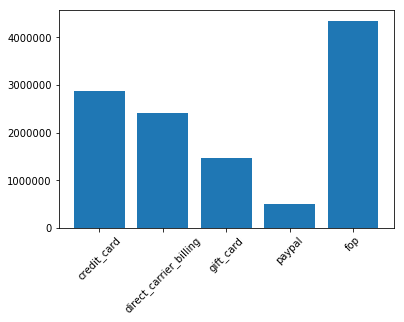

In [76]:
def GetRetBuyer(index):
    return(ret_buyer[['spend_usd_next_14_days']][(ret_buyer[index] == 1)&(ret_buyer.spend_usd_next_14_days>=0.001)])
cc_ret = GetRetBuyer('user_added_credit_card')
dc_ret = GetRetBuyer('user_added_dcb')
gc_ret = GetRetBuyer('user_added_gift_card')
pp_ret = GetRetBuyer('user_added_paypal')
fop_ret = GetRetBuyer('user_added_fop')
ret_sum = [cc_ret.sum(), dc_ret.sum(), gc_ret.sum(), pp_ret.sum(), fop_ret.sum()]
PlotList(ret_sum)

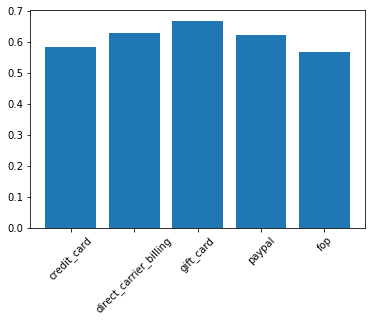

In [77]:
def GetRate(val, index):
    return(val.count()/float(ret_buyer.shape[0])/ret_buyer[index].mean())
ret_rate = [GetRate(cc_ret, 'user_added_credit_card'), GetRate(dc_ret, 'user_added_dcb'), GetRate(gc_ret, 'user_added_gift_card'), GetRate(pp_ret, 'user_added_paypal'), GetRate(fop_ret, 'user_added_fop')]
PlotList(ret_rate)

In [64]:
succ_buyer = clean_data[['made_purchase_before','user_added_credit_card', 'user_added_dcb', 'user_added_fop', 'user_added_gift_card', 'user_added_paypal']][clean_data.clicked_buy_before == 1]
succ_buyer.describe()

,made_purchase_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
count,127767.000000,127767.000000,127767.000000,127767.000000,127767.000000,127767.000000
mean,0.819014,0.559198,0.481885,0.977545,0.206501,0.104644
std,0.385008,0.496485,0.499674,0.148158,0.404796,0.306095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


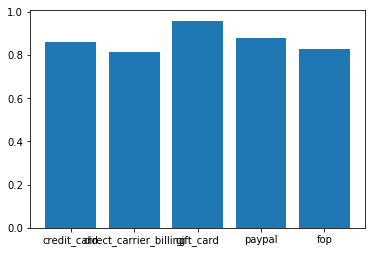

In [67]:
def GetSuccRate(index):
    return (succ_buyer[['made_purchase_before']][(succ_buyer['made_purchase_before'] == 1)&(succ_buyer[index] == 1)].shape[0]/float(succ_buyer.shape[0])/succ_buyer[index].mean())
succ_rate = [GetSuccRate('user_added_credit_card'), GetSuccRate('user_added_dcb'), GetSuccRate('user_added_gift_card'), GetSuccRate('user_added_paypal'), GetSuccRate('user_added_fop')]
PlotList(succ_rate)

In [102]:
raw_data =  pd.read_csv("C:\Users\wangz_i6ij2py\Downloads\Python_project_eda.csv")
spent_usd = raw_data[['spend_usd_next_14_days']][raw_data.spend_usd_next_14_days >= 0.001]

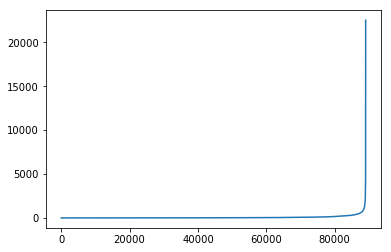

In [103]:
spent_list = spent_usd['spend_usd_next_14_days'].tolist()
spent_list.sort()
plt.plot(spent_list)

In [106]:
len(spent_list)

89032